In [19]:
vehicle_data.shape

(3947484, 8)

In [21]:
vehicle_data.dtypes

Month_IN_SERVICE        int64
V_MODEL_YEAR_CODE       int64
V_VML_CODE             object
V_TRANSMISSION_CODE    object
V_ENGINE_CODE          object
V_BODY_STYLE_CODE      object
V_DRIVE_CODE           object
I_MILEAGE               int64
dtype: object

In [22]:
#Finiding Missing values in the dataset

missing_numeric = pd.concat([data.isnull().sum()], axis=1, keys=['vehicle_data'])
missing_numeric = missing_numeric[(missing_numeric['vehicle_data']>0)]
missing_numeric.sort_values(by=['vehicle_data'], ascending=False)

,vehicle_data


In [30]:
#Finding number of classes in category variables

vehicle_data.select_dtypes(include=[object]).describe()


,V_VML_CODE,V_TRANSMISSION_CODE,V_ENGINE_CODE,V_BODY_STYLE_CODE,V_DRIVE_CODE
count,3947484,3947484,3947484,3947484,3947484
unique,17,9,9,7,2
top,T/LH,EG,UQ,ES,ALL
freq,701226,1540215,1013253,1666374,3304432


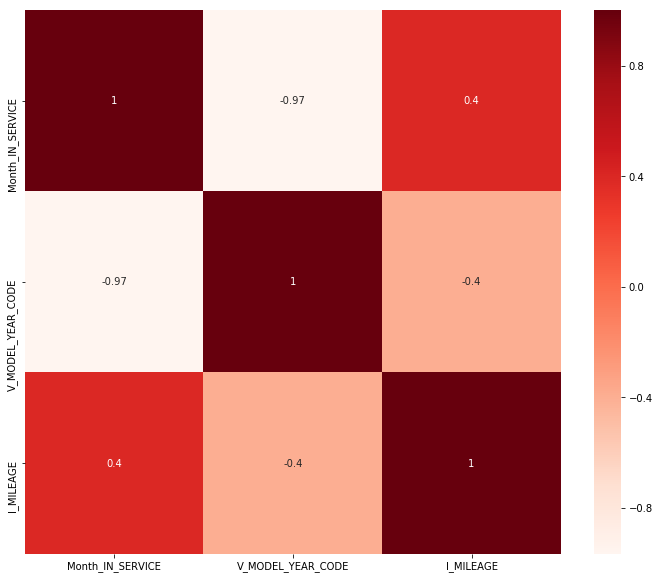

In [62]:
#Understanding coorelation between numeric lables 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
cor = vehicle_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

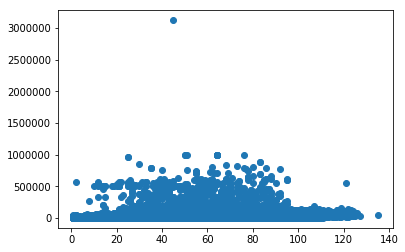

In [41]:
#Scatter plot to understand the relationship between Month_IN_SERVICE and I_MILEAGE
plt.scatter(vehicle_data['Month_IN_SERVICE'], vehicle_data['I_MILEAGE'])
plt.show()

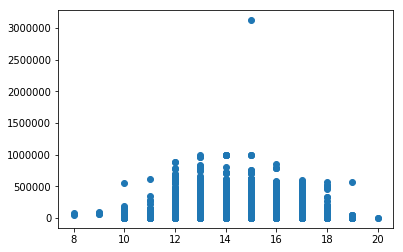

In [44]:
#Scatter plot to understand the relationship between V_MODEL_YEAR_CODE and I_MILEAGE
plt.scatter(vehicle_data['V_MODEL_YEAR_CODE'], vehicle_data['I_MILEAGE'])
plt.show()

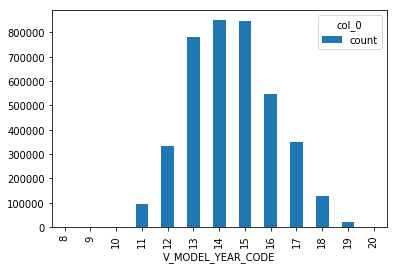

In [47]:
#Bar chart to understand the distribusion of V_MODEL_YEAR_CODE 
Modelyear = pd.crosstab(index = data['V_MODEL_YEAR_CODE'],columns="count")
Modelyear.plot.bar()

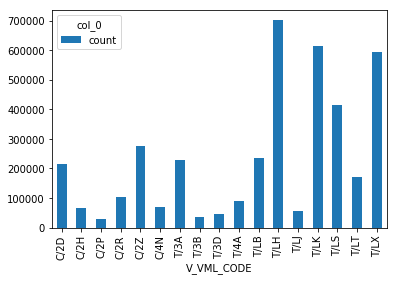

In [49]:
#Bar chart to understand the distribusion of V_VML_CODE 
modelline = pd.crosstab(index = data['V_VML_CODE'],columns="count")
modelline.plot.bar()

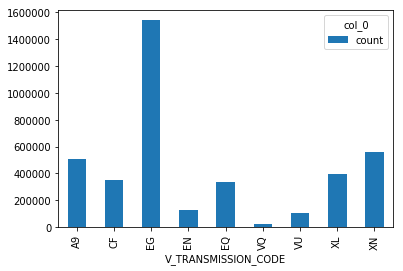

In [51]:
#Bar chart to understand the distribusion of V_TRANSMISSION_CODE 
trans_code = pd.crosstab(index = data['V_TRANSMISSION_CODE'],columns="count")
trans_code.plot.bar()

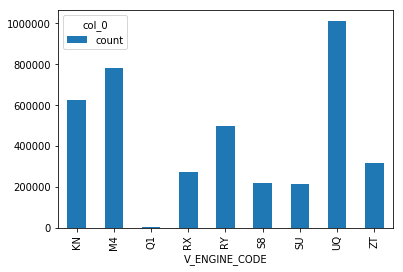

In [52]:
#Bar chart to understand the distribusion of V_ENGINE_CODE
Engine_code = pd.crosstab(index = data['V_ENGINE_CODE'],columns="count")
Engine_code.plot.bar()

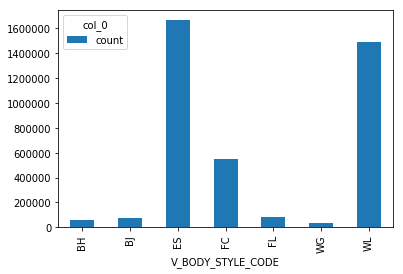

In [53]:
#Bar chart to understand the distribusion of V_BODY_STYLE_CODE
body_code = pd.crosstab(index = data['V_BODY_STYLE_CODE'],columns="count")
body_code.plot.bar()

In [55]:
#Relation between two categorical variables  using two-way table
cat_relation = pd.crosstab(index = data['V_VML_CODE'],columns=data['V_ENGINE_CODE'])
cat_relation

V_ENGINE_CODE,KN,M4,Q1,RX,RY,S8,SU,UQ,ZT
V_VML_CODE,,,,,,,,,
C/2D,0,25888,0,40478,23149,0,19775,107475,0
C/2H,0,10607,0,0,0,0,0,38979,16293
C/2P,0,0,0,13390,14834,0,0,0,0
C/2R,0,0,0,0,35387,0,0,68276,0
C/2Z,65009,80689,0,28167,10746,0,31256,59132,0
C/4N,0,50531,0,0,0,0,0,19794,0
T/3A,103552,126578,0,0,0,0,0,0,0
T/3B,0,0,0,0,0,0,0,34293,0
T/3D,0,0,0,0,0,0,0,44650,0


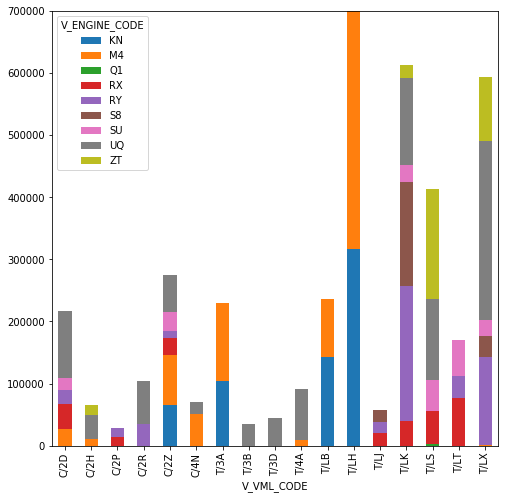

In [58]:
cat_relation.plot(kind ='bar', figsize=(8,8), stacked=True) 

In [61]:
#highests correlation features towards predicting variable 
vehicle_data.corr(method = 'pearson')

,Month_IN_SERVICE,V_MODEL_YEAR_CODE,I_MILEAGE
Month_IN_SERVICE,1.000000,-0.965717,0.397054
V_MODEL_YEAR_CODE,-0.965717,1.000000,-0.395269
I_MILEAGE,0.397054,-0.395269,1.000000


In [63]:
#changing object type into category type

vehicle_data['V_VML_CODE'] = vehicle_data['V_VML_CODE'].astype('category')
vehicle_data['V_ENGINE_CODE'] = vehicle_data['V_ENGINE_CODE'].astype('category')
vehicle_data['V_TRANSMISSION_CODE'] = vehicle_data['V_TRANSMISSION_CODE'].astype('category')
vehicle_data['V_BODY_STYLE_CODE'] = vehicle_data['V_BODY_STYLE_CODE'].astype('category')
vehicle_data['V_DRIVE_CODE'] = vehicle_data['V_DRIVE_CODE'].astype('category')

In [64]:
vehicle_data.dtypes

Month_IN_SERVICE          int64
V_MODEL_YEAR_CODE         int64
V_VML_CODE             category
V_TRANSMISSION_CODE    category
V_ENGINE_CODE          category
V_BODY_STYLE_CODE      category
V_DRIVE_CODE           category
I_MILEAGE                 int64
dtype: object

In [66]:
#Getting Categorical calumns from data set
cat_column = vehicle_data.select_dtypes({'category'}).columns
cat_column

Index(['V_VML_CODE', 'V_TRANSMISSION_CODE', 'V_ENGINE_CODE',
       'V_BODY_STYLE_CODE', 'V_DRIVE_CODE'],
      dtype='object')

In [67]:
#Changing Categorical variables in numericals variables 
#assigning numerical values to categories 
vehicle_data[cat_column]=vehicle_data[cat_column].apply(lambda x: x.cat.codes)

In [72]:
vehicle_data.head()

,Month_IN_SERVICE,V_MODEL_YEAR_CODE,V_VML_CODE,V_TRANSMISSION_CODE,V_ENGINE_CODE,V_BODY_STYLE_CODE,V_DRIVE_CODE,I_MILEAGE
0,93,12,14,5,2,2,0,49057
1,90,12,14,5,2,2,0,32966
2,90,12,14,5,2,2,0,33835
3,93,11,14,5,2,2,0,45803
4,93,11,14,5,2,2,0,42122


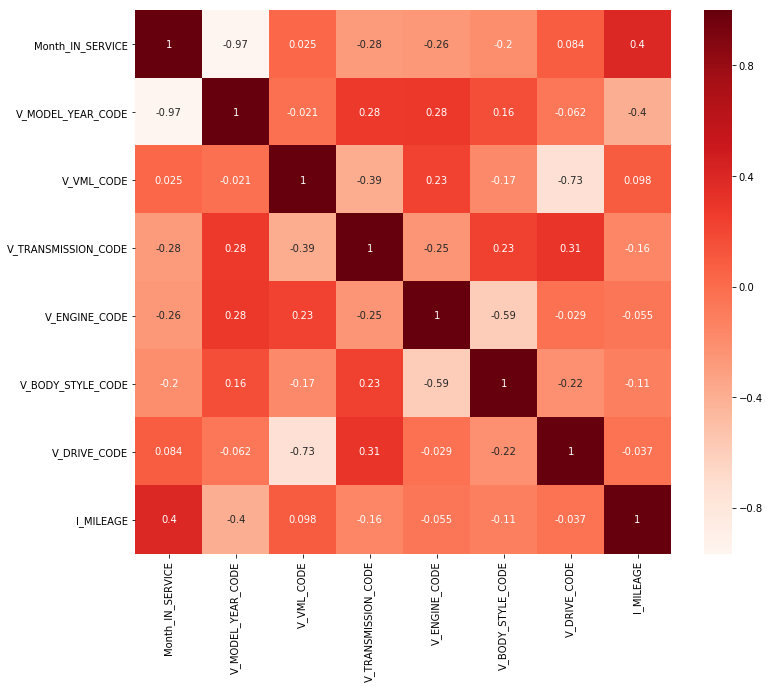

In [73]:
#heat map to check relationship after converting categorical into numerical values 
plt.figure(figsize=(12,10))
cor = vehicle_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [74]:
#Correlation with output variable
cor_target = abs(cor["I_MILEAGE"])

In [77]:
#Selecting highly correlated features after coverting categorical into numerical 
relevant_features = cor_target[cor_target>0.3]
relevant_features

Month_IN_SERVICE     0.397054
V_MODEL_YEAR_CODE    0.395269
I_MILEAGE            1.000000
Name: I_MILEAGE, dtype: float64